### Bret Young
#### DSC 640
#### Assignment 5.2
#### 5 November 2020

- heat map
- spatial map
- contour plot

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Load dataset
url = '~/Desktop/DSC 640/ex5-2/ppg2008.csv'
data_1 = pd.read_csv(url, index_col = 0)

In [51]:
data_1.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [53]:
# normalize data so "G" does not dominate colors
data_1_norm = (data_1 - data_1.mean()) / (data_1.max() - data_1.min())

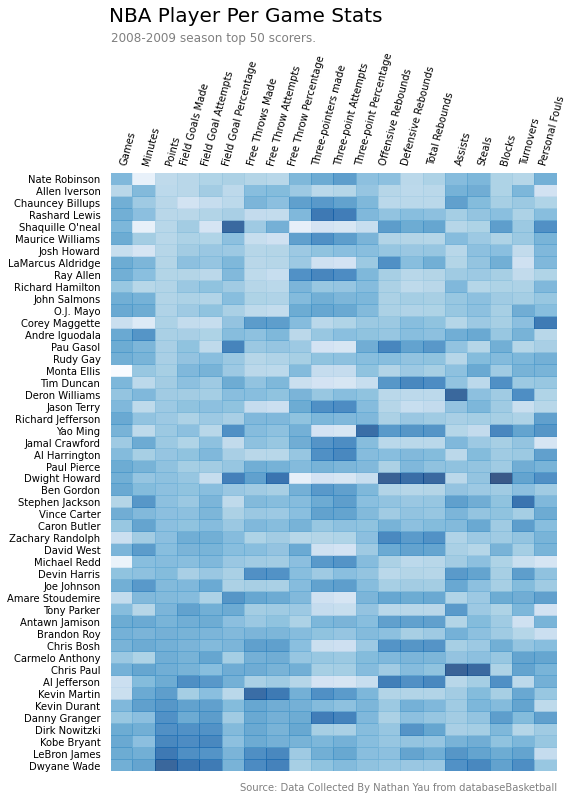

In [133]:
# Import required package
import seaborn as sns

# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(8, 11)

# Add plot to figure
ax1.pcolor(data_1_norm, cmap=plt.cm.Blues, alpha=0.8)

# Set titles, caption and axis labels
fig.suptitle("NBA Player Per Game Stats", x = 0.36, y = 1.09, fontsize=20)
fig.text(.90, .1, 'Source: Data Collected By Nathan Yau from databaseBasketball', ha = 'right', color = 'gray')
ax1.set_title("2008-2009 season top 50 scorers.", y = 1.21, loc='left', color = 'gray')

# Set labels
labels = ['Games', 'Minutes', 'Points', 'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percentage', 'Free Throws Made', 'Free Throw Attempts', 'Free Throw Percentage',
    'Three-pointers made', 'Three-point Attempts', 'Three-point Percentage', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls']
ax1.set_xticklabels(labels, minor = False)
ax1.set_yticklabels(data_1_norm.index, minor = False)

# put the major ticks at the middle of each cell
ax1.set_xticks(np.arange(data_1_norm.shape[1]) + 0.8, minor=False)
ax1.set_yticks(np.arange(data_1_norm.shape[0]) + 0.5, minor=False)

# rotate the x labels and move to top
ax1.xaxis.tick_top()
plt.xticks(rotation = 75)

# Turn off ticks
for t in ax1.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax1.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)

# Remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Show plot
plt.show

# save file
fig.savefig("python_heatmap.png", bbox_inches='tight')

In [109]:
# Load dataset
url_2 = '~/Desktop/DSC 640/ex5-2/costcos-geocoded.csv'
data_2 = pd.read_csv(url_2)

In [110]:
data_2.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [146]:
# import libraries
import folium
from IPython.display import HTML, display

# Make an empty map
m = folium.Map(location = [37.0902, -95.7129], tiles = "OpenStreetMap", zoom_start = 3.25)
 
# add markers
for i in range(0, len(data_2)):
    folium.CircleMarker([data_2.iloc[i]['Latitude'], data_2.iloc[i]['Longitude']], radius = .25, popup = data_2.iloc[i]['Address']).add_to(m)

# display map in notebook
display(m)

# save file
m.save("python_spatial map.html")

In [154]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [155]:

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

z = np.array([f(x, y) for (x,y) in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)

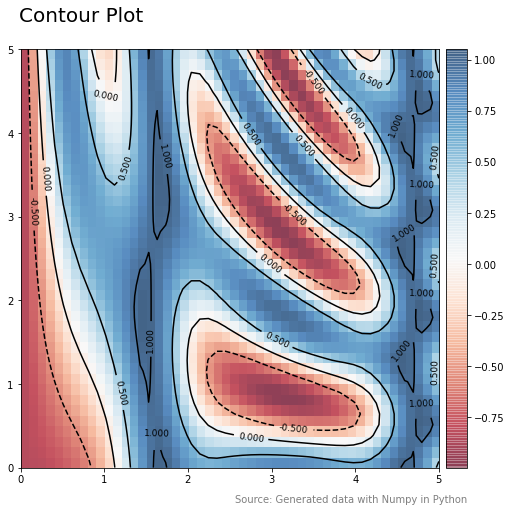

In [184]:
# import library
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create axes and figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Set figure size
fig.set_size_inches(8, 8)

contours = plt.contour(X, Y, Z, 4, colors = 'black')
ax1.clabel(contours, inline = True, fontsize = 9)

ax1.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdBu', alpha = 0.5)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.1)

fig.colorbar(ax1.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower',
           cmap='RdBu', alpha = 0.5), cax = cax)

# Set titles, caption and axis labels
fig.suptitle("Contour Plot", x = 0.23, y = .94, fontsize = 20)
fig.text(.90, .08, 'Source: Generated data with Numpy in Python', ha = 'right', color = 'gray')

# save file
fig.savefig("python_contour.png", bbox_inches='tight')